  # REGRESIÓN CON SVM, CART, BAGGING y BOOST


## 📌 ACTIVIDAD 1: REPASAR ALGORITMOS SVM

### REGRESIÓN LINEAL CON SVM Y UNA SOLA PREDICTORA

Crea el notebook saa_u03_p01_a5-<tus_iniciales>.ipynb donde entregar esta actividad. Utiliza pandas
para cargar los datos del fichero "50_startups.csv" (puedes utilizar una copia del fichero
u02_p03_a1_<tus_iniciales>.ipynb). Utilizaremos como predictora la columna "I&D Spend" (que
significa gasto en I+D) y como target usaremos "Profit" (beneficios) tal y como hicimos en una práctica
anterior.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar datos
df = pd.read_csv("../../U2_AprendizajeSupervisado/recursos/U02_P03/50_Startups.csv")

# Selección de variables
X = df[["R&D Spend"]].values
y = df[["Profit"]].values

En todos los procesos aleatorios utiliza una misma semilla, en mi caso usaré "123". Divide los datos en
train y test dejando el 70% para entrenamiento. Una vez particionados en X_train, y_train, X_test,
y_test crea un sklearn.preprocessing.StandardScaler() y lo entrenas con X_train para normalizar
X_train y X_test. También vamos a escalar los y_train e y_test con su propio objeto escalador. Este
código no te lo paso, debes hacerlo tu mismo. Los parámetros de los objetos escaladores aparecen
abajo, no tienen que coincidir porque dependen de los datos que se usen (elección aleatoria) pero si
deben ser razonablemente parecidos.

In [8]:
# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Normalización
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

Crea un objeto sklearn.Linear.LinearSVR() con hiperparámetro epsilon de 0.5 y tu semilla aleatoria
y lo llamas svm. Luego lo entrenas. Para graficar la SVM escribe estas dos funciones, una que calcula los
vectores soporte y otra que dibuja los datos train y el modelo.

In [9]:
from sklearn.svm import LinearSVR

svm = LinearSVR(epsilon=0.5, random_state=123)
svm.fit(X_train_scaled, y_train_scaled.ravel())


LinearSVR(epsilon=0.5, random_state=123)

In [14]:
import matplotlib.pyplot as plt

def calcula_vectores_soporte(svm, X, y):
    predicciones = svm.predict(X)
    fuera_del_margen = np.abs(y.ravel() - predicciones) >= svm.epsilon
    return np.argwhere(fuera_del_margen)

svm.soporte_ = calcula_vectores_soporte(svm, X_train_scaled, y_train_scaled)

def plot_svm_regresion(model, X, y, intervalo_x):
    x_test = np.linspace(intervalo_x[0], intervalo_x[1], 100).reshape(-1, 1)
    y_pred = model.predict(x_test)

    plt.plot(x_test, y_pred, label="SVM", color="blue")
    plt.scatter(X, y, c="black", s=50, alpha=0.5, label="Train")

    # Corregimos aquí:
    plt.xlim(intervalo_x[0], intervalo_x[1])
    plt.ylim(min(y)-0.5, max(y)+0.5)  # esto es solo un ejemplo, puedes ajustarlo mejor si sabes el rango de y

    plt.title("SVM Regresión")
    plt.legend()
    plt.grid(True)



Representa la SVM entrenada en un gráfico en el intervalo [-2.5, 2.5] de X y de Y.


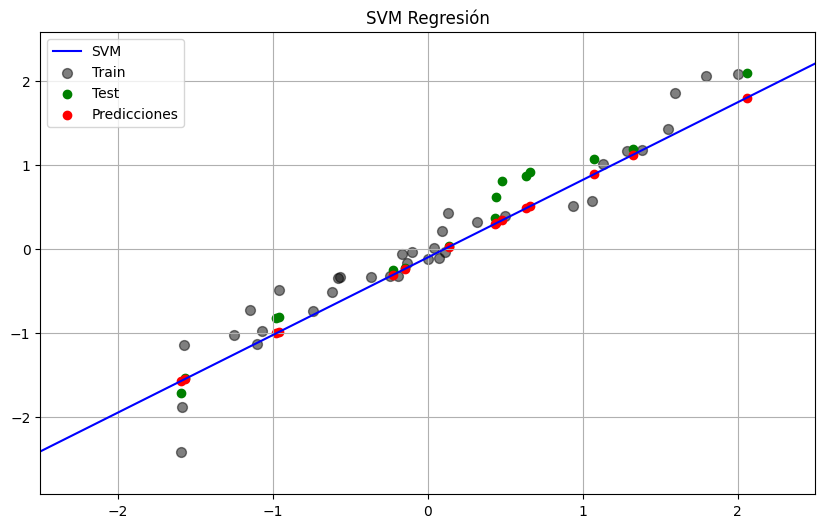

SVM Coeficientes: [0.92291196]
SVM Intercepto: [-0.10148506]
R2 Train: 0.9202145225816121
R2 Test: 0.9467713600753255


In [15]:
from sklearn.metrics import r2_score

# Predicciones
y_train_pred = svm.predict(X_train_scaled)
y_test_pred = svm.predict(X_test_scaled)

# Gráficos
plt.figure(figsize=(10,6))
plot_svm_regresion(svm, X_train_scaled, y_train_scaled, [-2.5, 2.5])
plt.scatter(X_test_scaled, y_test_scaled, color="green", label="Test")
plt.scatter(X_test_scaled, y_test_pred, color="red", label="Predicciones")
plt.legend()
plt.show()

# Coeficientes y evaluación
print("SVM Coeficientes:", svm.coef_)
print("SVM Intercepto:", svm.intercept_)
print("R2 Train:", r2_score(y_train_scaled, y_train_pred))
print("R2 Test:", r2_score(y_test_scaled, y_test_pred))


 Añade otro gráfico scatterplot() de los datos de test en color verde con la etiqueta "test". Haz otro
gráfico scatterplot() de los datos predichos para X_test en color rojo con la etiqueta "predicciones"
(deben caer sobre la línea principal de la SVM).

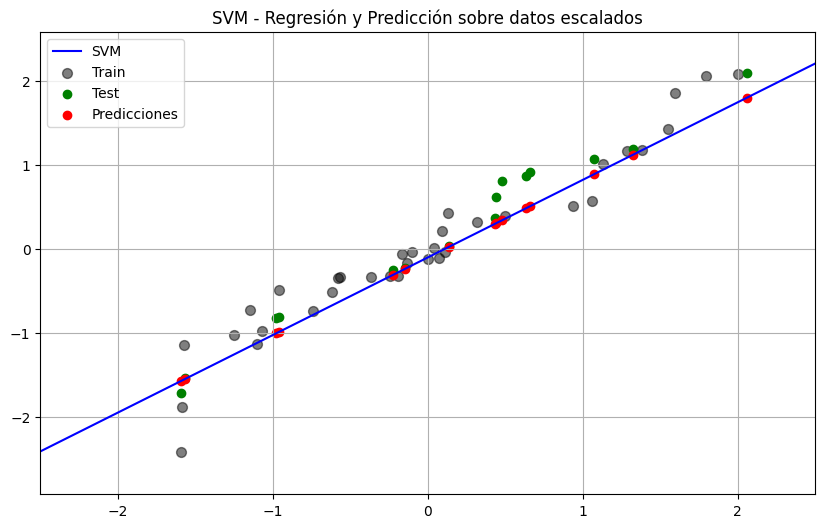

In [16]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Predicciones del modelo SVM
y_train_pred = svm.predict(X_train_scaled)
y_test_pred = svm.predict(X_test_scaled)

# Gráfica
plt.figure(figsize=(10,6))
plot_svm_regresion(svm, X_train_scaled, y_train_scaled, [-2.5, 2.5])
plt.scatter(X_test_scaled, y_test_scaled, color="green", label="Test")           # puntos reales de test
plt.scatter(X_test_scaled, y_test_pred, color="red", label="Predicciones")       # predicciones
plt.title("SVM - Regresión y Predicción sobre datos escalados")
plt.legend()
plt.show()

Por último, muestra los coeficientes y el punto de corte del modelo y su score (coeficiente de
determinación R2) para datos de train y test.

In [18]:
print("SVM Coeficientes:", svm.coef_)
print("SVM Intercepto:", svm.intercept_)
print("R2 Train:", r2_score(y_train_scaled, y_train_pred))
print("R2 Test:", r2_score(y_test_scaled, y_test_pred))

SVM Coeficientes: [0.92291196]
SVM Intercepto: [-0.10148506]
R2 Train: 0.9202145225816121
R2 Test: 0.9467713600753255


ENTREGA 1:


Muestra:
 a) Código y capturas de ejecución.

 b) ¿Si SVR(kernel="linear") es equivalente a LinearSVR() qué diferencia hay entre ambos?

 c) Puesto que es necesario escalar los datos para usar las máquinas de vector soporte cómodo utilizar un , es más
pipeline que nos permita realizar las dos operaciones unificadas. Crea un pipeline con sklearn.pipeline make_pipeline() y un LinearSVR() con que integre un objeto que normalice los datos epsilon 0.5 y tu semilla aleatoria, lo entrenas y vuelves a calcular el score sobre los datos de test ¿Coincide el score con el regresor anterior?

 ### CUANDO Y COMO USAR CADA POSIBLE REGRESOR SVM

 La siguiente tabla muestra un resumen de las diferentes características de varios regresores basados en
SVM:

<table>
  <thead>
    <tr style="background-color: #90EE90;">
      <th style="color: black;">Regresor</th>
      <thstyle="color: black;">¿Cuándo usarlo?</th>
      <th style="color: black;">Características clave</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>SVR</td>
      <td>Datos no lineales, flexibilidad con $\epsilon$</td>
      <td>Soporta kernel, útil si < 10000 datos aprox.</td>
    </tr>
    <tr>
      <td>NuSVR</td>
      <td>Como SVR, controla complejidad con $\nu$</td>
      <td>Controla cuántos puntos son vectores de soporte</td>
    </tr>
    <tr>
      <td>LinearSVR</td>
      <td>Datos lineales, eficiente con muchos datos</td>
      <td>Más rápido, sin kernels, para muchos datos</td>
    </tr>
  </tbody>
</table>

 Vamos a probar resultados con datos sintéticos que simulan una función no lineal.

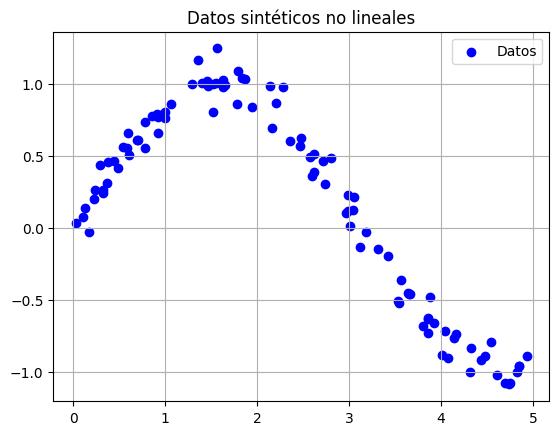

In [20]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Datos no lineales
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # función no lineal

# Mostrar datos
plt.scatter(X, y, color="blue", label="Datos")
plt.title("Datos sintéticos no lineales")
plt.grid()
plt.legend()
plt.show()


 En primer lugar usa un modelo SVR con un kernel="rbf", C=1 y gamma=0.1.
Vamos a jugar a ajustar lo máximo que podamos el modelo a los datos de entrenamiento. Debes crear una figura de 1 fila y 2 columnas, y entrenar primero el modelo original, calcular el MSE y generar el gráfico de como
predice. Luego cambia los parámetros y haz lo mismo dibujando el gráfico de la derecha. Recuera que:

 • C controla el margen (aumentas si undefitting y bajas si overfitting):

 ◦ C pequeño: permite más errores a cambio de más suavidad en la predicción (evita
sobreajuste).

 ◦ C grande: penaliza más los errores → intenta ajustarse mejor a los datos.

 • epsilon es la tolerancia al error, define un margen dentro del cual el error no se penaliza.

 ◦ ε pequeño (por ejemplo 0.01) predicción más precisa, intenta ajustarse a los datos.

 ◦ ε grande (1.0 o más) más tolerancia al error, no se ajusta tanto a los datos y reduce
sensibilidad a datos ruidosos (generaliza mejor).

 • gamma define cuanta influencia tienen los puntos individuales en la forma del kernel RBF:

 ◦ gamma pequeño (0.01 por ejemplo) cada punto afecta a una gran región → suave y

general.
 ◦ gamma grande (10 o más): el modelo se adapta a detalles locales.

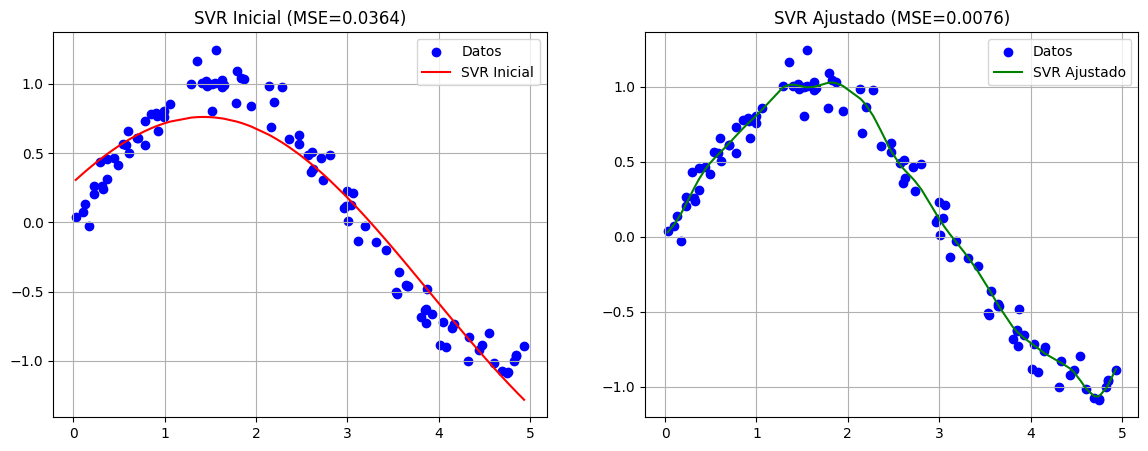

In [21]:
svr1 = make_pipeline(
    StandardScaler(),
    SVR(kernel='rbf', C=1, epsilon=0.1, gamma=0.1)
)
svr1.fit(X, y)
y_pred1 = svr1.predict(X)
mse1 = mean_squared_error(y, y_pred1)

svr2 = make_pipeline(
    StandardScaler(),
    SVR(kernel='rbf', C=100, epsilon=0.01, gamma=10)
)
svr2.fit(X, y)
y_pred2 = svr2.predict(X)
mse2 = mean_squared_error(y, y_pred2)

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(X, y, color="blue", label="Datos")
axs[0].plot(X, y_pred1, color="red", label="SVR Inicial")
axs[0].set_title(f"SVR Inicial (MSE={mse1:.4f})")
axs[0].legend()
axs[0].grid(True)

axs[1].scatter(X, y, color="blue", label="Datos")
axs[1].plot(X, y_pred2, color="green", label="SVR Ajustado")
axs[1].set_title(f"SVR Ajustado (MSE={mse2:.4f})")
axs[1].legend()
axs[1].grid(True)

plt.show()


Ahora vamos a realizar lo mismo con NuSVR, que es similar a SVR pero controlas la complejidad del
modelo con el hiperparámetro un que indica el porcentaje de puntos que queremos usar como
vectores de soporte. Comienza con kernel="rbf", C=100, gamma=0.1 y nu=0.4. Entrena y visualiza su
predicción. Luego cambia primero un, luego el resto de hiperparámetros hasta conseguir ajustar
mucho los datos.

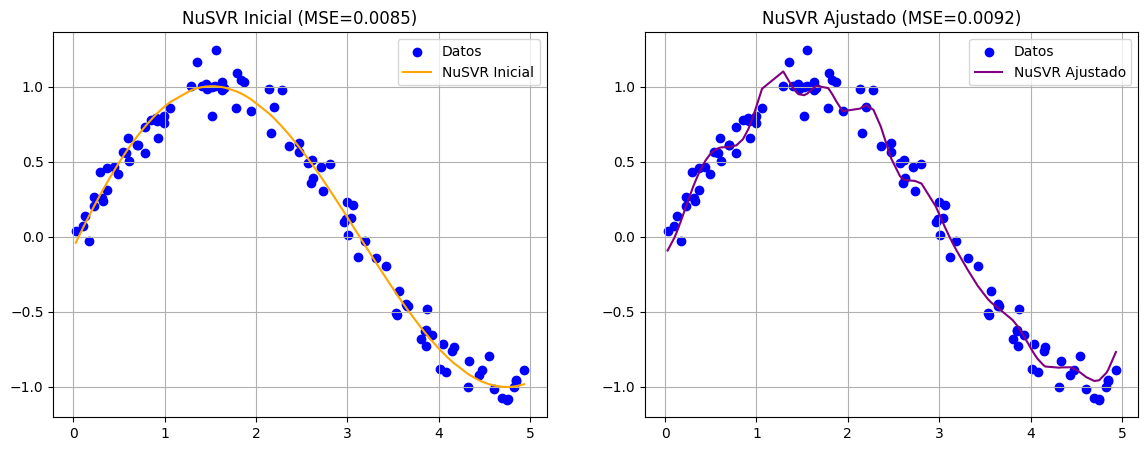

In [22]:
nusvr1 = make_pipeline(
    StandardScaler(),
    NuSVR(kernel="rbf", C=100, gamma=0.1, nu=0.4)
)
nusvr1.fit(X, y)
y_pred1 = nusvr1.predict(X)
mse_nu1 = mean_squared_error(y, y_pred1)

nusvr2 = make_pipeline(
    StandardScaler(),
    NuSVR(kernel="rbf", C=1000, gamma=10, nu=0.1)
)
nusvr2.fit(X, y)
y_pred2 = nusvr2.predict(X)
mse_nu2 = mean_squared_error(y, y_pred2)

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(X, y, color="blue", label="Datos")
axs[0].plot(X, y_pred1, color="orange", label="NuSVR Inicial")
axs[0].set_title(f"NuSVR Inicial (MSE={mse_nu1:.4f})")
axs[0].legend()
axs[0].grid(True)

axs[1].scatter(X, y, color="blue", label="Datos")
axs[1].plot(X, y_pred2, color="purple", label="NuSVR Ajustado")
axs[1].set_title(f"NuSVR Ajustado (MSE={mse_nu2:.4f})")
axs[1].legend()
axs[1].grid(True)

plt.show()


Ahora lo mismo con LinearSVR, que es más rápido aunque solo sirve si los datos son ajustables
linealmente porque no usa kernels. Comienza con C=1, epsilon=0.5. Entrena y visualiza su predicción.
Luego cambia los hiperparámetros hasta conseguir ajustar mucho los datos.


C:\Users\ESP\Desktop\MachineLearning\saa\.venv\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


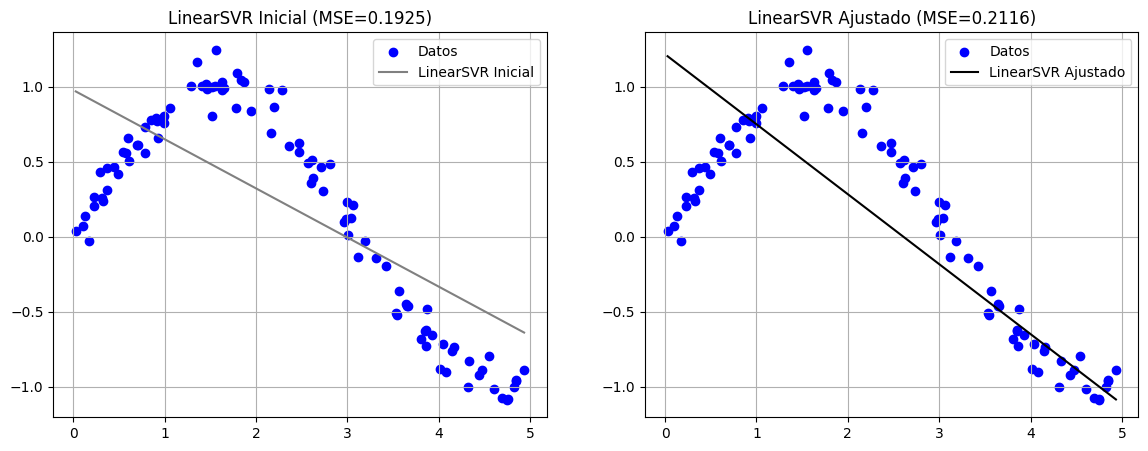

In [24]:
lsvr1 = make_pipeline(
    StandardScaler(),
    LinearSVR(C=1, epsilon=0.5, random_state=42)
)
lsvr1.fit(X, y)
y_pred1 = lsvr1.predict(X)
mse_lsvr1 = mean_squared_error(y, y_pred1)

lsvr2 = make_pipeline(
    StandardScaler(),
    LinearSVR(C=100, epsilon=0.01, random_state=42)
)
lsvr2.fit(X, y)
y_pred2 = lsvr2.predict(X)
mse_lsvr2 = mean_squared_error(y, y_pred2)

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(X, y, color="blue", label="Datos")
axs[0].plot(X, y_pred1, color="gray", label="LinearSVR Inicial")
axs[0].set_title(f"LinearSVR Inicial (MSE={mse_lsvr1:.4f})")
axs[0].legend()
axs[0].grid(True)

axs[1].scatter(X, y, color="blue", label="Datos")
axs[1].plot(X, y_pred2, color="black", label="LinearSVR Ajustado")
axs[1].set_title(f"LinearSVR Ajustado (MSE={mse_lsvr2:.4f})")
axs[1].legend()
axs[1].grid(True)

plt.show()


 ENTREGA 2:
Muestra:

 a)
 Código y capturas de ejecución con gráficos previo y posterior y cálculos de MSE

### DETECCIÓN DE ANOMALÍAS CON REGRESORES

Otro uso de los modelos consiste en utilizarlos para detectar outliers. En el caso de las SVM tenemos a
OneClassSVM, que es un clasificador y tenemos un modelo lineal regresor como RANSACRegressor.
Veamos un ejemplo de uso:

In [25]:
import numpy as np

# Generar datos de regresión con ruido
np.random.seed(675)                   # cambia por tu semilla!!
X = np.random.rand(100, 1) * 10        # Característica entre 0 y 10
y = 2.5 * X.flatten() + np.random.randn(100) * 2  # Linea distorsionada con ruido de amplitud 2

# Introducir outliers en los datos
outliers = np.random.randint(0, 100, 10) # Seleccionamos 10 índices aleatorios
y[outliers] += np.random.randint(20, 50, size=10) # Aumentamos el valor de esos puntos

 Ahora entrenamos un modelo lineal usando todos los datos (incluidos outliers), e imprimimos su
configuración y generamos un gráfico de datos, outliers y predicciones que hace.

Regresión Lineal con outliers:
Recta= 3.91 + (2.31)X

Regresión Lineal sin outliers (detectados por OneClassSVM):
Recta= 4.02 + (2.24)X


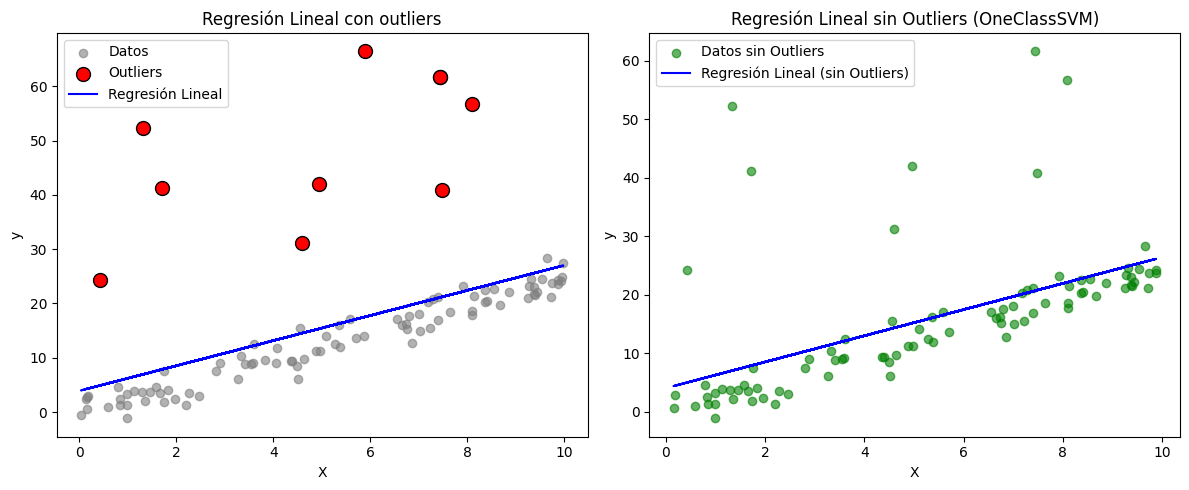

In [26]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# Generar datos de regresión con ruido
np.random.seed(449)                   # cambia por tu semilla!!
X = np.random.rand(100, 1) * 10        # Característica entre 0 y 10
y = 2.5 * X.flatten() + np.random.randn(100) * 2  # Linea distorsionada con ruido de amplitud 2

# Introducir outliers en los datos
outliers_indices = np.random.randint(0, 100, 10) # Seleccionamos 10 índices aleatorios
y[outliers_indices] += np.random.randint(20, 50, size=10) # Aumentamos el valor de esos puntos

# Ajustar modelo de regresión lineal (con los outliers)
lr_with_outliers = LinearRegression()
lr_with_outliers.fit(X, y)
y_pred_lr_outliers = lr_with_outliers.predict(X)
print("Regresión Lineal con outliers:")
print(f"Recta= {lr_with_outliers.intercept_:.2f} + ({lr_with_outliers.coef_[0]:.2f})X")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, y, color="gray", alpha=0.6, label="Datos")
plt.scatter(X[outliers_indices], y[outliers_indices], color="red", label="Outliers", edgecolor="black", s=100)
plt.plot(X, y_pred_lr_outliers, color="blue", label="Regresión Lineal")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Regresión Lineal con outliers")

# Detectar outliers usando OneClassSVM
scaler = StandardScaler()
X_escalada = scaler.fit_transform(X)

oc_svm = OneClassSVM(nu=0.1)  # nu controla la proporción de outliers esperados
oc_svm.fit(X_escalada)
mascara = oc_svm.predict(X_escalada)

# Filtrar los datos sin outliers
X_sin_outliers = X[mascara == 1]
y_sin_outliers = y[mascara == 1]

# Entrenar un nuevo modelo lineal sin los outliers
lr_sin_outliers = LinearRegression()
lr_sin_outliers.fit(X_sin_outliers, y_sin_outliers)
y_pred_lr_sin_outliers = lr_sin_outliers.predict(X_sin_outliers)

print("\nRegresión Lineal sin outliers (detectados por OneClassSVM):")
print(f"Recta= {lr_sin_outliers.intercept_:.2f} + ({lr_sin_outliers.coef_[0]:.2f})X")

plt.subplot(1, 2, 2)
plt.scatter(X_sin_outliers, y_sin_outliers, color="green", alpha=0.6, label="Datos sin Outliers")
plt.plot(X_sin_outliers, y_pred_lr_sin_outliers, color="blue", label="Regresión Lineal (sin Outliers)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Regresión Lineal sin Outliers (OneClassSVM)")

plt.tight_layout()
plt.show()

Completa el código de arriba para que usando OneClassSVM: detecte los outliers. Cuando entrenes el
modelo y le pidas predicciones, clasificará los datos no outliers como clase 1. Por tanto puedes crear
una máscara con los datos que son normales mascara=oc_svm.predict(X_escalada) y usando la
máscara puedes quedarte con los datos sin outliers: X[mascara] e y[mascara] con los que entrenar de
nuevo un modelo lineal y mostrar su configuración y predicciones: <span style="color:green">Completado</span>


 El modelo RANSAC (Random Sample Consensus) es útil cuando tienes datos con outliers y queremos
entrenar un modelo de regresión que sea robusto frente a ellos con el objeto RANSACRegressor que tiene
estos hiperparámetros:

• estimator=LinearRegression(): Modelo de regresión a usar dentro de RANSAC.

 • max_trials=100: Número máximo de intentos para encontrar un modelo sin outliers.

 • residual_threshold=10: Límite para considerar un punto como atípico o no

 Puedes hacer algo parecido a lo que has hecho con OneClassSVM, crear una máscara y usarla para
quedarte solo con los datos normales. La forma de hacerlo seria: mascara = ransac.inlier_mask_. El
resultado:


Regresión Lineal robusta con RANSAC:
Recta= -0.08 + (2.47)X


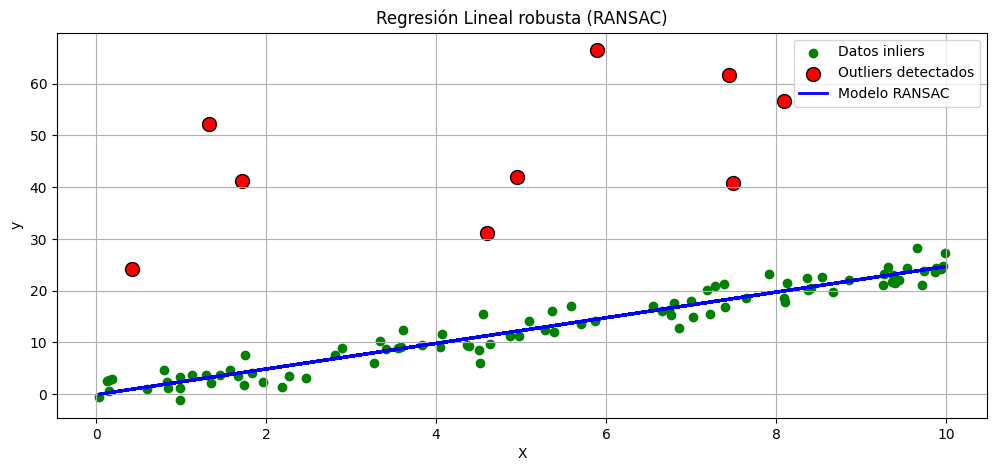

In [27]:
from sklearn.linear_model import RANSACRegressor

# Creamos modelo RANSAC
ransac = RANSACRegressor(
    estimator=LinearRegression(),
    max_trials=100,
    residual_threshold=10,
    random_state=42
)

# Entrenamos con todos los datos
ransac.fit(X, y)

# Predicción
y_pred_ransac = ransac.predict(X)

# Máscara de inliers detectados por RANSAC
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Fórmula del modelo ajustado con RANSAC
coef_ransac = ransac.estimator_.coef_[0]
intercept_ransac = ransac.estimator_.intercept_

print("\nRegresión Lineal robusta con RANSAC:")
print(f"Recta= {intercept_ransac:.2f} + ({coef_ransac:.2f})X")

# Gráfica comparativa
plt.figure(figsize=(12, 5))

plt.scatter(X[inlier_mask], y[inlier_mask], color='green', label='Datos inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='red', label='Outliers detectados', edgecolor='black', s=100)
plt.plot(X, y_pred_ransac, color='blue', linewidth=2, label='Modelo RANSAC')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Regresión Lineal robusta (RANSAC)")
plt.grid(True)
plt.show()


 ENTREGA 3: Muestra:

 a) Capturas de ejecución y el código donde aparezcan fórmulas del modelo y gráficos de
predicciones del modelo de regresión lineal con outliers y una vez eliminados tras detectarlos
con OneClassSVM.

 b) Capturas de ejecución y el código donde aparezcan fórmulas del modelo y gráficos de
predicciones del modelo de regresión lineal con outliers y una vez eliminados tras detectarlos
con RANSAC.

### UTILIZACIÓN DE KERNELS


La siguiente tabla resumen los diferentes kernels que podemos usar en SVM. En la mayoría de
ocasiones el que mejores resultados suele dar es rbf porque tiene la capacidad de adaptarse muy bien
a datos complejos. Y en el caso de la regresión, uno de ellos suele dar malos resultados.

<table>
  <thead>
    <tr style="background-color: #90EE90;">
      <th style="color: black;">Kernel</th>
      <th style="color: black;">Mejor Uso</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Lineal</td>
      <td>Cuando los datos son separables con una recta</td>
    </tr>
    <tr>
      <td>Polinómico</td>
      <td>Si la relación entre variables es polinómica</td>
    </tr>
    <tr>
      <td>RBF (Gaussiano)</td>
      <td>Cuando la separación entre clases es compleja y desconocida</td>
    </tr>
    <tr>
      <td>Sigmoide</td>
      <td>Para relaciones parecidas a redes neuronales</td>
    </tr>
  </tbody>
</table>

 Vamos a probarlos:

 Copia este código en el notebook y modifica las líneas 8 y 13 para que los procesos aleatorios sean
repetibles en caso de ser necesario de manera que la semilla que elijas dependa de tu nombre y
apellidos (n_letras_nombre concatenar n_letras_apellido1 concatenar n_letras_apellido2).


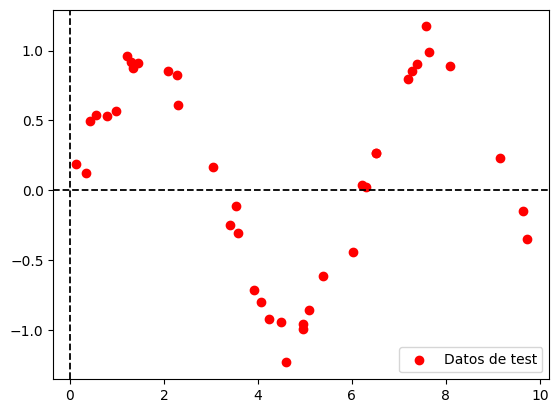

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generar datos artificiales (con ruido)
np.random.seed(449)                   # Semilla 449 porque Jose = 4 Rosa=4 Rodriguez=9
X = np.sort(10 * np.random.rand(200, 1), axis=0) # Entrada (200 ejemplos)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0]) # Salida con ruido

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=449)

# Calcular rango de los datos para calcular la magnitud porcentual del error
rango = y.max() - y.min()

# Graficar resultados
plt.scatter(X_test, y_test, color="red", label="Datos de test")
plt.legend()
plt.axhline(0, color='black', linewidth=1.3, linestyle='--') # Eje horizontal (y=0)
plt.axvline(0, color='black', linewidth=1.3, linestyle='--') # Eje vertical

 Si graficamos los datos de test nos saldrá algo parecido a esto:


 Vamos a utilizar un SVR con diferentes kernel pero siempre con los hiperparámetros C=1 y
epsilon=0.1 para ver como modeliza estos datos. Para cada cada uno generamos el gráfico scatter de
los datos predichos (x_test, y_pred) en color azul y calculamos el MSE (con
"mean_squared_error(y_test, y_pred)" y la magnitud porcentual del error comparada con los
valores que toman los datos y. Deberías obtener gráficos similares a estos cuatro:


Kernel: linear
MSE: 0.5126
Error porcentual promedio: 9.15%

Kernel: poly
MSE: 0.5429
Error porcentual promedio: 16.42%

Kernel: rbf
MSE: 0.0153
Error porcentual promedio: 10.83%

Kernel: sigmoid
MSE: 136.6866
Error porcentual promedio: 656.05%



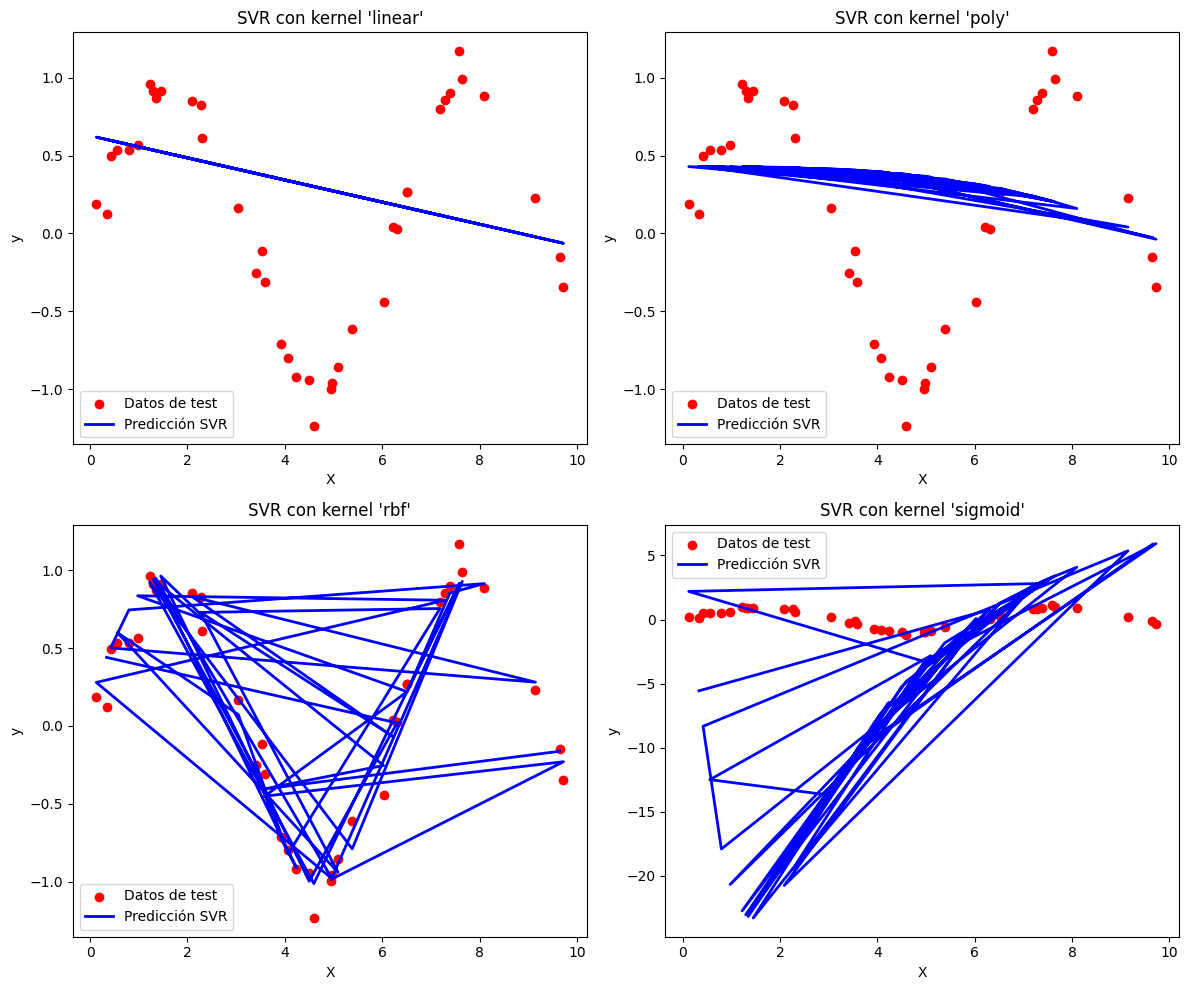

In [29]:
# Importar librerías necesarias
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Inicializamos un gráfico de 2x2 para mostrar los resultados con los diferentes kernels
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Definir diferentes kernels para probar
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Definir los hiperparámetros
C = 1
epsilon = 0.1

for i, kernel in enumerate(kernels):
    # Crear y ajustar el modelo SVR con cada kernel
    svr = SVR(kernel=kernel, C=C, epsilon=epsilon)
    svr.fit(X_train, y_train)

    # Predecir con el modelo ajustado
    y_pred = svr.predict(X_test)

    # Calcular el MSE
    mse = mean_squared_error(y_test, y_pred)

    # Calcular la magnitud porcentual del error
    error_percentage = (np.abs(y_test - y_pred) / y_test) * 100
    mean_error_percentage = np.mean(error_percentage)  # Promedio del error porcentual

    # Mostrar resultados
    print(f"Kernel: {kernel}")
    print(f"MSE: {mse:.4f}")
    print(f"Error porcentual promedio: {mean_error_percentage:.2f}%\n")

    # Graficar los resultados
    ax = axs[i//2, i%2]  # Determinamos el subplot correspondiente
    ax.scatter(X_test, y_test, color="red", label="Datos de test")
    ax.plot(X_test, y_pred, color='blue', label="Predicción SVR", linewidth=2)
    ax.set_title(f"SVR con kernel '{kernel}'")
    ax.set_xlabel("X")
    ax.set_ylabel("y")
    ax.legend()

plt.tight_layout()
plt.show()
